In [129]:
import pandas as pd
import zipfile
import os
import requests
import matplotlib.pyplot as plt

In [130]:
#URL del dashboard
url="https://portafolioinfdoctos.cnbv.gob.mx/Documentacion/minfo/Hipotecarios_Marginales.zip"

In [131]:
#Cambiar directorio y crear carpeta
os.chdir("D:")
#Crear carpeta
if not os.path.exists("D:/credvivi"):
    os.makedirs("D:/credvivi")
os.chdir("D:/credvivi")

In [132]:
#Descargar archivo zip"
r = requests.get(url,verify=False)
with open("Hipotecarios_Marginales.zip", "wb") as code:
        code.write(r.content)

#Descomprimir archivo zip
with zipfile.ZipFile("Hipotecarios_Marginales.zip","r") as zip_ref:
        zip_ref.extractall()
os.remove("Hipotecarios_Marginales.zip")

c:\Users\claud\miniconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'portafolioinfdoctos.cnbv.gob.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [133]:
#leer archivo csv
df = pd.read_csv("Hipotecario_marginal.csv",encoding='latin-1')
print("Número de registros totales: {0:,}".format(len(df)))

Número de registros totales: 1,089,435


In [134]:
#Crear variables de año y mes a partir de la variable cve_periodo transformada a string y usando un loop
df['cve_periodo']=df['cve_periodo'].astype(str)
df['año']=0
df['mes']=0
for i in range(len(df)):
    df['año'][i]=df['cve_periodo'][i][0:4]
    df['mes'][i]=df['cve_periodo'][i][4:6]
#Crear variable de fecha
df['fecha']=pd.to_datetime(df['año']+'-'+df['mes']+'-01')

C:\Users\claud\AppData\Local\Temp\ipykernel_26304\1801379434.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['año'][i]=df['cve_periodo'][i][0:4]
C:\Users\claud\AppData\Local\Temp\ipykernel_26304\1801379434.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mes'][i]=df['cve_periodo'][i][4:6]


In [135]:
df

,sector,cve_periodo,nombre_publicacion,dl_estado,dl_municipio,dat_ingreso_mensual_bruto,dat_valor_vivienda_originacion,tipo_acreditado,dl_tipo_comprobacion,dat_ai_edad_acred,...,numero de crédito,dat_monto_orig_cred,dl_destino_credito,dl_producto_hipotecario,Tipo de Crédito,dl_segmento_vivienda,tasa_ponderada,año,mes,fecha
0,BANCA MÚLTIPLE,202105,Ve por Más,MEXICO,CHIMALHUACAN,11728.62,37321.38,Asalariado Público,Asalariado,48,...,Crédito 1002,37321.38,"Mejoras, Ampliaciones y/o Remodelaciones",INFONAVIT TOTAL,Sin cofinanciamiento,Remodelación o mejoramiento con gtía otorg Ban...,17.0,2021,05,2021-05-01
1,BANCA MÚLTIPLE,202105,Ve por Más,MEXICO,ECATEPEC DE MORELOS,8440.86,17409.14,Asalariado Público,Asalariado,24,...,Crédito 806,17409.14,"Mejoras, Ampliaciones y/o Remodelaciones",INFONAVIT TOTAL,Sin cofinanciamiento,Remodelación o mejoramiento con gtía otorg Ban...,17.0,2021,05,2021-05-01
2,BANCA MÚLTIPLE,202105,Ve por Más,MEXICO,HUIXQUILUCAN,7473.84,32693.37,Asalariado Público,Asalariado,37,...,Crédito 221,32693.37,"Mejoras, Ampliaciones y/o Remodelaciones",INFONAVIT TOTAL,Sin cofinanciamiento,Remodelación o mejoramiento con gtía otorg Ban...,17.0,2021,05,2021-05-01
3,BANCA MÚLTIPLE,202105,Ve por Más,MEXICO,IXTLAHUACA,6812.64,11657.75,Asalariado Público,Asalariado,25,...,Crédito 1077,11657.75,"Mejoras, Ampliaciones y/o Remodelaciones",INFONAVIT TOTAL,Sin cofinanciamiento,Remodelación o mejoramiento con gtía otorg Ban...,17.0,2021,05,2021-05-01
4,BANCA MÚLTIPLE,202105,Ve por Más,MEXICO,JOCOTITLAN,6076.35,12095.12,Asalariado Público,Asalariado,24,...,Crédito 1024,12095.12,"Mejoras, Ampliaciones y/o Remodelaciones",INFONAVIT TOTAL,Sin cofinanciamiento,Remodelación o mejoramiento con gtía otorg Ban...,17.0,2021,05,2021-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089430,SOCIEDADES FINANCIERAS DE OBJETO MULTIPLE,202104,ION Financiera,NUEVO LEON,SANTA CATARINA,149782.50,1400700.00,Asalariado Privado,Asalariado,47,...,Crédito 3,924396.00,Crédito Para Líquidez,Liquidez Inmediata ION,Sin cofinanciamiento,Interés Social,17.5,2021,04,2021-04-01
1089431,SOCIEDADES FINANCIERAS DE OBJETO MULTIPLE,202107,ION Financiera,MEXICO,HUIXQUILUCAN,214366.89,12682000.00,No Asalariado,No asalariado,49,...,Crédito 9,5588590.00,Crédito Para Líquidez,Liquidez Inmediata ION,Sin cofinanciamiento,Media o Residencial,18.5,2021,07,2021-07-01
1089432,SOCIEDADES FINANCIERAS DE OBJETO MULTIPLE,202112,ION Financiera,GUANAJUATO,LEON,55798.33,1339000.00,Asalariado Privado,Asalariado,29,...,Crédito 4,1205100.00,Adquisición de Vivienda Nueva,Adquiere tu casa ION,Sin cofinanciamiento,Interés Social,17.4,2021,12,2021-12-01
1089433,SOCIEDADES FINANCIERAS DE OBJETO MULTIPLE,202112,ION Financiera,GUANAJUATO,LEON,114390.56,1920800.00,No Asalariado,No asalariado,43,...,Crédito 5,1536640.00,Adquisición de Vivienda Usada,Adquiere tu casa ION,Sin cofinanciamiento,Media o Residencial,15.4,2021,12,2021-12-01


### Conteo de créditos por mes

In [136]:
#Créditos por mes
df.groupby(['fecha']).count()[['cve_periodo']]

,cve_periodo
fecha,
2019-01-01,19890
2019-02-01,22068
2019-03-01,32009
2019-04-01,30339
2019-05-01,26003
2019-06-01,26462
2019-07-01,26017
2019-08-01,25459
2019-09-01,27654


### Gráficas

In [147]:
#Parámetros de la gráfica
plt.rcParams["font.family"]="Consolas"
c="#bcbddc"

Text(0.1, -0.1, 'Fuente: @claudiodanielpc con información de CNBV')

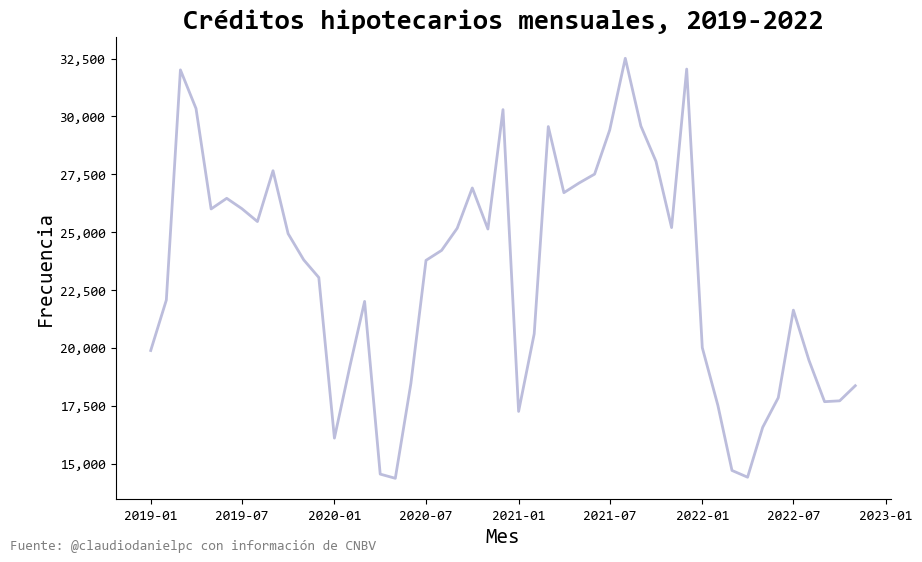

In [148]:
#Crear gráfica de línea
fig=plt.figure(figsize=(10,6))

#Crear gráfica de línea
plt.plot(df.groupby(['fecha']).count()[['cve_periodo']],color=c,linewidth=2)
plt.title('Créditos hipotecarios mensuales, 2019-2022', fontsize=20, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Número de créditos')
#Título del eje x
plt.xlabel('Mes', fontsize=15)
#Título del eje y
plt.ylabel('Frecuencia', fontsize=15)
#Eje y con comas
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#ELiminar marco superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.text(0.1, -0.1, 'Fuente: @claudiodanielpc con información de CNBV', fontsize=10, color='gray', ha='center', va='center', transform=plt.gca().transAxes)

Text(0.1, -0.1, 'Fuente: @claudiodanielpc con información de CNBV')

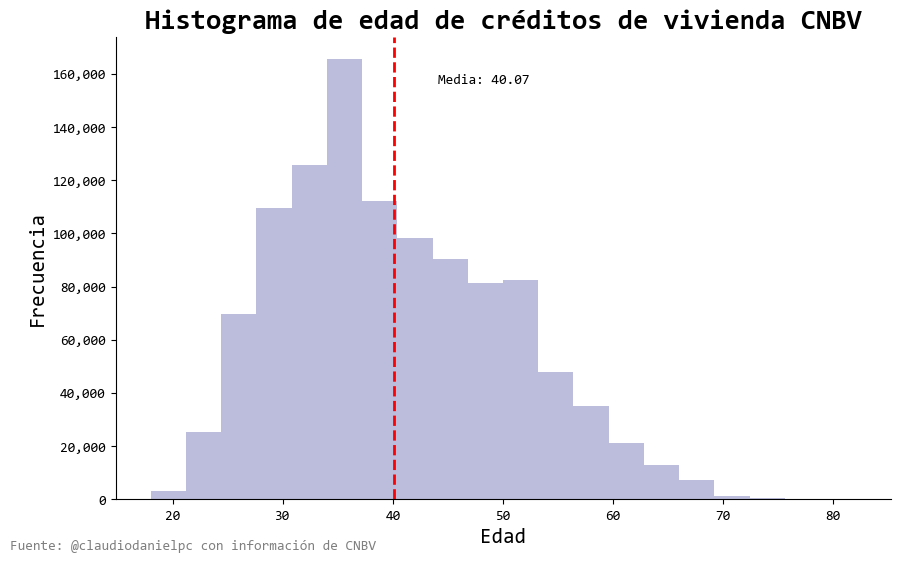

In [149]:
#Histograma de edad
#Crear figura
fig=plt.figure(figsize=(10,6))

#Crear histograma
plt.hist(df['dat_ai_edad_acred'],bins=20,color=c)
#Título del histograma
plt.title('Histograma de edad de créditos de vivienda CNBV', fontsize=20, fontweight='bold')
#Título del eje x
plt.xlabel('Edad', fontsize=15)
#Título del eje y
plt.ylabel('Frecuencia', fontsize=15)
#Eje y con comas
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#ELiminar marco superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#Añadir línea de media
plt.axvline(df['dat_ai_edad_acred'].mean(), color='red', linestyle='dashed', linewidth=2)
#Añadir texto de media
min_ylim, max_ylim = plt.ylim()
plt.text(df['dat_ai_edad_acred'].mean()*1.1, max_ylim*0.9, 'Media: {:.2f}'.format(df['dat_ai_edad_acred'].mean()))
#Añadir fuente
plt.text(0.1, -0.1, 'Fuente: @claudiodanielpc con información de CNBV', fontsize=10, color='gray', ha='center', va='center', transform=plt.gca().transAxes)